In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv",delimiter=",",encoding="utf-8",index_col=0)
df.sample(10)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
634,85,12,2,49.4,0,0,14,31,19,12,3,1,0,0
388,106,23,0,38.0,0,0,14,31,19,12,3,1,0,0
574,127,33,2,49.0,0,0,14,31,19,12,3,1,0,0
515,110,28,0,55.0,0,0,14,31,19,12,3,1,0,0
294,44,18,0,35.0,0,0,14,31,19,12,3,1,0,0
513,110,28,0,35.0,0,0,21,31,19,12,3,1,0,0
278,117,18,1,65.0,0,0,6,7,19,12,3,1,0,0
613,12,12,2,49.4,0,0,14,31,19,12,3,1,0,0
603,12,12,2,49.4,0,0,14,31,19,12,3,1,0,0
389,106,23,0,57.0,0,0,14,31,19,12,3,1,1,0


In [3]:
df['gender'].value_counts()

1    389
0    302
2    172
Name: gender, dtype: int64

In [17]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


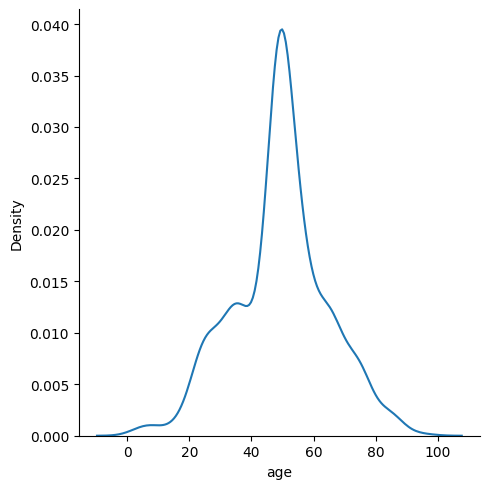

In [9]:
sns.displot(df,x='age',kind='kde')

## Split dataset:
Before applying feature selection method, we need to split the data first. The reason is that we only select features based on the information from the training set, not on the whole data set

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['result'],axis=1)
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)


In [11]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")


shape of X_train: (690, 13)
shape of X_test: (173, 13)
shape of y_train: (690,)
shape of y_test: (173,)


In [31]:
import numpy as np
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, SelectFromModel, f_classif, chi2, \
                                       mutual_info_classif)
from typing import Optional


class FeatureSelector:
    def __init__(self, X_train, y_train: Optional[np.array] = None) -> None:
        self.features = X_train
        self.variance_removal = None
        self.y = y_train

    def remove_low_variance(self, threshold: Optional[int] = 0):
        self.variance_removal = VarianceThreshold(threshold=threshold)
        return self.variance_removal.fit_transform(self.features)

    def chi2_test(self, n_features=6):
        selector = SelectKBest(chi2, k=n_features)
        return selector, selector.fit_transform(self.features, self.y)

    def f_test(self, n_features=6):
        selector = SelectKBest(f_classif, k=n_features)
        return selector, selector.fit_transform(X=self.features, y=self.y)

    def mutual_info(self, n_features=6):
        selector = SelectKBest(mutual_info_classif, k=n_features)
        return selector, selector.fit_transform(X=self.features, y=self.y)

    def f_test_then_mutual(self, n_features=6):
        selector1, features1 = self.f_test(n_features)
        selector2, features2 = self.mutual_info(n_features)
        return np.intersect1d(selector1.feature_names_in_,
                              selector2.feature_names_in_)


In [33]:
! pip install umap-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00


In [34]:
from typing import Optional, Union

import numpy as np
from enum import Enum
from sklearn.manifold import TSNE
from umap import UMAP


class PlotType(Enum):
    UMAP = 0
    TSNE = 1


def plot_data(features: np.array,
              target: Union[np.array, None],
              method: PlotType = PlotType.UMAP,
              n_component: Optional[int] = 2):
    match method:
        case PlotType.UMAP:
            umap_md = UMAP(n_components=n_component,
                           init='random',
                           random_state=2023, )
            return umap_md.fit_transform(X=features,
                                             y=target)
        case PlotType.TSNE:
            tsne_md = TSNE(n_components=n_component,
                           learning_rate='auto',
                           random_state=2023)
            return tsne_md.fit_transform(X=features,y=target)



In [ ]:
selector = FeatureSelector(X_train)
selected_features = selector.remove_low_variance(threshold=0.4)

In [ ]:
selected_features.shape

(690, 9)

In [ ]:
selector.variance_removal.get_feature_names_out()

array(['location', 'country', 'gender', 'age', 'symptom1', 'symptom2',
       'symptom3', 'symptom4', 'diff_sym_hos'], dtype=object)

In [18]:
X_train

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
560,19,32,0,49.4,1,0,14,31,19,12,3,1,0
161,27,11,2,49.4,0,0,14,31,19,12,3,1,0
443,108,24,1,29.0,0,0,14,31,19,12,3,1,0
234,1,18,1,65.0,0,0,6,17,19,12,3,1,0
150,99,8,1,48.0,0,0,14,31,19,12,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,45,13,0,38.0,0,0,14,31,19,12,3,1,0
695,45,13,0,57.0,0,0,14,31,19,12,3,1,0
454,108,24,0,34.0,0,0,14,31,19,12,3,1,0
537,114,29,2,49.4,1,0,14,31,19,12,3,1,0


In [38]:
sel = FeatureSelector(X_train.drop(['diff_sym_hos'],axis=1),y_train)
selector1,features = sel.chi2_test()

In [39]:
selector2,features2 = sel.f_test()

In [40]:
selector3,features3 = sel.mutual_info()

In [43]:
selector2.get_feature_names_out()

array(['country', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1',
       'symptom4'], dtype=object)

In [44]:
selector3.get_feature_names_out()

array(['location', 'country', 'gender', 'age', 'symptom3', 'symptom6'],
      dtype=object)

In [51]:
filtered_features =np.intersect1d(selector2.get_feature_names_out(),selector3.get_feature_names_out())

In [58]:
X_filtered_train = X_train[filtered_features]

In [59]:
X_filtered_train

,age,country
560,49.4,32
161,49.4,11
443,29.0,24
234,65.0,18
150,48.0,8
...,...,...
732,38.0,13
695,57.0,13
454,34.0,24
537,49.4,29


In [54]:
y_train

560    0
161    0
443    0
234    0
150    0
      ..
732    0
695    0
454    0
537    0
855    0
Name: result, Length: 690, dtype: int64

In [62]:
import plotly.express as px
fig_2d = px.scatter(
    X_filtered_train, x="age", y="country",
    color=y_train,
    title="selection of interection between mutual & f-test"
)
fig_2d.show()

In [63]:
X_union = np.union1d(selector2.get_feature_names_out(),selector3.get_feature_names_out())
X_union = X_train[X_union]

In [64]:
X_union

,age,country,from_wuhan,gender,location,symptom1,symptom3,symptom4,symptom6,vis_wuhan
560,49.4,32,0,0,19,14,19,12,1,1
161,49.4,11,0,2,27,14,19,12,1,0
443,29.0,24,0,1,108,14,19,12,1,0
234,65.0,18,0,1,1,6,19,12,1,0
150,48.0,8,0,1,99,14,19,12,1,0
...,...,...,...,...,...,...,...,...,...,...
732,38.0,13,0,0,45,14,19,12,1,0
695,57.0,13,0,0,45,14,19,12,1,0
454,34.0,24,0,0,108,14,19,12,1,0
537,49.4,29,0,2,114,14,19,12,1,1


In [65]:
projected3d = plot_data(X_union,y_train,PlotType.UMAP,n_component=3)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [68]:
fig_3d = px.scatter_3d(
    projected3d, x=0, y=1, z=2,
    color=y_train, labels={'color': 'result',"0":"feature 1","1":"feature 2","2":"feature 3"},
    title="Projected Data Points in 3d using UMAP after selection of the union between mutual & f-test"
)

In [69]:
fig_3d.show()